In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
from sklearn.model_selection import train_test_split
np.random.seed(42)

# Reading the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
data = pd.read_csv(url, delim_whitespace=True, header=None,
                 names=["mpg", "cylinders", "displacement", "horsepower", "weight",
                        "acceleration", "model year", "origin", "car name"])

In [2]:
# Clean the above data by removing redundant columns and rows with junk values

# print(data.head(10))
# print("\nShape:", data.shape)

# print("\nInfo:")
# print(data.info())

# print("Missing values per column:\n", data.isnull().sum())
# print("Count of '?' in each column:\n", (data == '?').sum())
# print("Count of zero values per column:\n", (data == 0).sum())

data.replace('?', np.nan, inplace=True)
data.dropna(inplace=True) 

# num = data['car name'].unique()
# print(shape(num))
#Since the car name column is categorical and mostly unique to each record, it does not provide meaningful patterns for prediction. 
#Therefore, we drop it and use only the numeric features for training the model for predicting mpg of a vehicle based on its characteristics.
X = data.drop(['mpg', 'car name'], axis=1)
X = X.astype("float64")
y = data['mpg']

In [3]:
#training on our implementaton of decision tree model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTree(criterion="information_gain")
# Applying the decision tree to train the model
X_train = pd.DataFrame(X_train)
y_train = pd.Series(y_train)

model.fit(X_train, y_train)

X_test = pd.DataFrame(X_test)
y_test = pd.Series(y_test)
pred= model.predict(X_test)

print("RMSE:", rmse(pd.Series(pred), y_test))
print("MAE:", mae(pd.Series(pred), y_test))

RMSE: 2.9511908916979834
MAE: 2.121010411908772


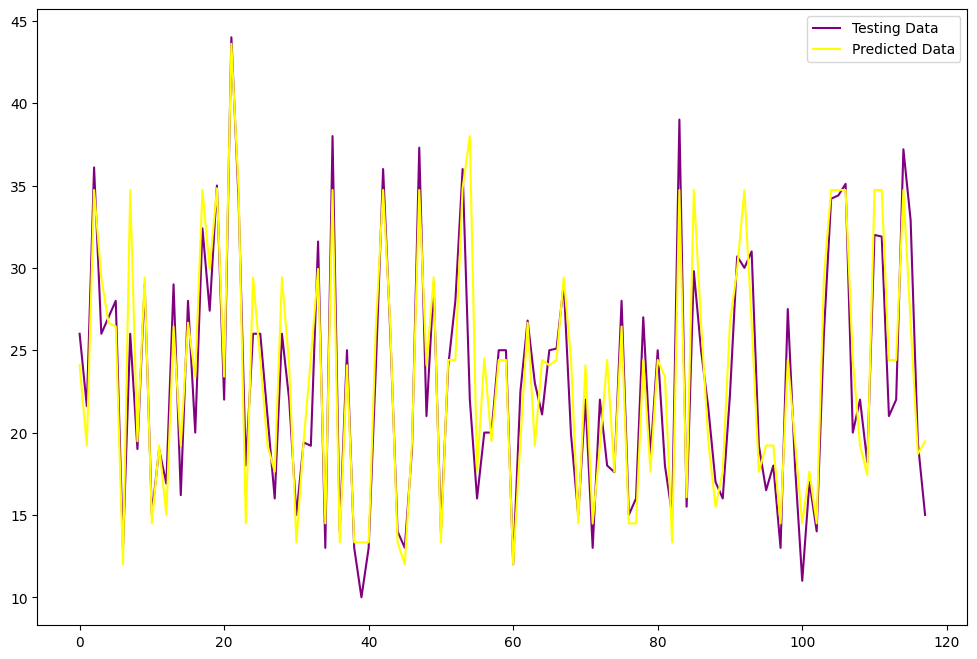

In [8]:
x = np.arange(len(y_test))
plt.figure(figsize=(12,8))
plt.plot(x, y_test, color="purple", label="Testing Data")
plt.plot(x, pred, color="yellow", label="Predicted Data")
plt.legend()
plt.show()

The model was trained on vehicle features such as cylinders, displacement, horsepower, and weight to predict their fuel efficiency (mpg). When evaluated on test data, the predicted mpg values aligned closely with the actual values, showing that the model was able to generalize well and make reasonable predictions for unseen vehicles.

In [9]:
#comparing the performance of our model with the decision tree module from scikit learn

import time
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

#time required by sklearn model

start= time.time()

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred_in = model.predict(X_test)

end= time.time()
print(f"Time required by Inbuilt model: {end-start}")

#time required by our model

start= time.time()
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

model= DecisionTree(criterion="information_gain")
model.fit(X_train, y_train)
y_pred_out = model.predict(X_test)
end= time.time()

print(f"Time required by our model: {end-start}")

Time required by Inbuilt model: 0.0071942806243896484
Time required by our model: 1.0411920547485352


The inbuilt DecisionTreeRegressor from scikit learn required only 0.007 seconds, whereas our custom implementation took about 1.04 seconds for training and testing on the same dataset. This large difference arises because sklearn’s implementation is written in optimized C/C++ and leverages vectorized operations, while our model is written in pure Python with explicit loops.

Root Mean Squared Error by inbuilt model:3.4872
Root Mean Squared Error by our model:2.9512


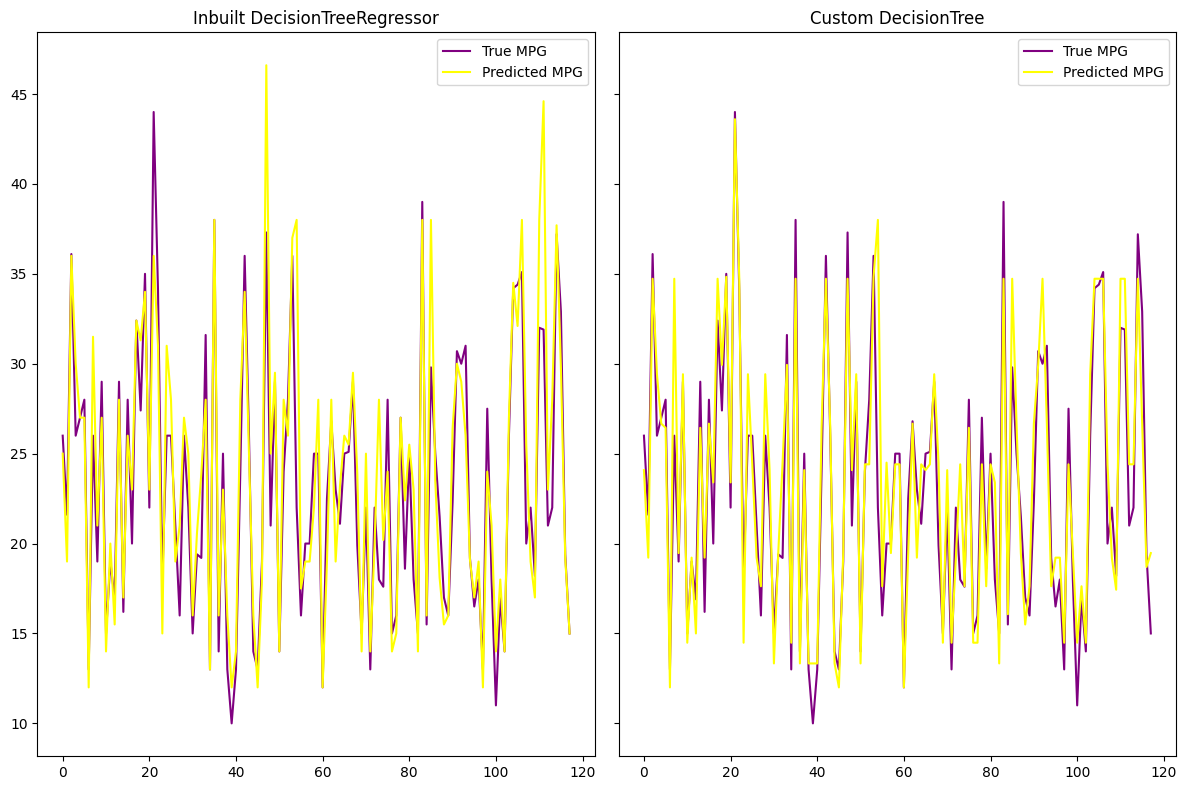

In [11]:
print(f"Root Mean Squared Error by inbuilt model:{rmse(pd.Series(y_pred_in), y_test):.4f}")
print(f"Root Mean Squared Error by our model:{rmse(pd.Series(y_pred_out), y_test):.4f}")

x_axis = range(len(y_test))
fig, axes = plt.subplots(1, 2, figsize=(12, 8), sharey=True)

axes[0].plot(x_axis, y_test.values, color="purple", label="True MPG")
axes[0].plot(x_axis, y_pred_in, color="yellow", label="Predicted MPG")
axes[0].set_title("Inbuilt DecisionTreeRegressor")
axes[0].legend()

axes[1].plot(x_axis, y_test.values, color="purple", label="True MPG")
axes[1].plot(x_axis, y_pred_out, color="yellow", label="Predicted MPG")
axes[1].set_title("Custom DecisionTree")
axes[1].legend()

plt.tight_layout()
plt.show()